In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/CLAN CHAT/Fraud.csv/Fraud.csv');

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.shape

(6362620, 11)

## The last coloum (isflaged) is unnececeory because we don't need any preregistered answers

In [7]:
df=data.iloc[:,:10]

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


# Data Info

### Step= categorical

### type= categorical

### amount=numrical

### nameOrig= unknown

### oldblanceOrg=numerical

### nameDest=unknown

### oldbalanceDest=numerical

### newbalanceDest=numerical

### isFraud=result

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

As per the above set we can clarify that there Are no missing values

now we have to focus on outliers

In [10]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
print(df.shape)
print("Total number of origin names in the DATA",len(df.nameOrig.unique()))
print("Total number of depatur names in the DATA",len(df.nameDest.unique()))

(6362620, 10)
Total number of origin names in the DATA 6353307
Total number of depatur names in the DATA 2722362


This shows that there are repleted number of repeators in reciviers

In [12]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [14]:
#Encodig
print(df.type.unique())
df.type=df.type.map({'PAYMENT':0, 'TRANSFER':1, 'CASH_OUT':2,'DEBIT':3,'CASH_IN':4})
df

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,1,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


## Amount

In [15]:
print("min",df.amount.min())
print("Max",df.amount.max())

"""
df.amount=df.amount.apply(lambda v : (v-df.amount.min())/(df.amount.max()-df.amount.min()))
df"""

from sklearn.preprocessing import MinMaxScaler
data = df['amount'].values.reshape(-1, 1)

Scaler = MinMaxScaler()
scaled_data = Scaler.fit_transform(data)
df['amount']=scaled_data



min 0.0
Max 92445516.64


In [16]:
print("min",df.oldbalanceOrg.min())
print("Max",df.oldbalanceOrg.max())

data = df['oldbalanceOrg'].values.reshape(-1, 1)
scaled_data = Scaler.fit_transform(data)
df['oldbalanceOrg']=scaled_data


min 0.0
Max 59585040.37


In [17]:
print("min",df.newbalanceOrig.min())
print("Max",df.newbalanceOrig.max())

data = df['newbalanceOrig'].values.reshape(-1, 1)
scaled_data = Scaler.fit_transform(data)
df['newbalanceOrig']=scaled_data

min 0.0
Max 49585040.37


In [18]:
print("min",df.oldbalanceDest.min())
print("Max",df.oldbalanceDest.max())

data = df['oldbalanceDest'].values.reshape(-1, 1)
scaled_data = Scaler.fit_transform(data)
df['oldbalanceDest']=scaled_data

min 0.0
Max 356015889.35


In [19]:
print("min",df.newbalanceDest.min())
print("Max",df.newbalanceDest.max())

data = df['newbalanceDest'].values.reshape(-1, 1)
scaled_data = Scaler.fit_transform(data)
df['newbalanceDest']=scaled_data

min 0.0
Max 356179278.92


In [20]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,0.000106,C1231006815,0.002855,0.003233,M1979787155,0.000000,0.000000,0
1,1,0,0.000020,C1666544295,0.000357,0.000391,M2044282225,0.000000,0.000000,0
2,1,1,0.000002,C1305486145,0.000003,0.000000,C553264065,0.000000,0.000000,1
3,1,2,0.000002,C840083671,0.000003,0.000000,C38997010,0.000059,0.000000,1
4,1,0,0.000126,C2048537720,0.000697,0.000603,M1230701703,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,0.003674,C786484425,0.005701,0.000000,C776919290,0.000000,0.000954,1
6362616,743,1,0.068272,C1529008245,0.105923,0.000000,C1881841831,0.000000,0.000000,1
6362617,743,2,0.068272,C1162922333,0.105923,0.000000,C1365125890,0.000192,0.017912,1
6362618,743,1,0.009195,C1685995037,0.014265,0.000000,C2080388513,0.000000,0.000000,1


In [21]:
a=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']
df[a].corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.001992,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
type,-0.001992,1.000000,0.050693,0.415700,0.431006,0.165383,0.135362,-0.004463
amount,0.022373,0.050693,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,0.415700,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,0.431006,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.165383,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.135362,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,-0.004463,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [22]:
df=df[a]

Visulisation


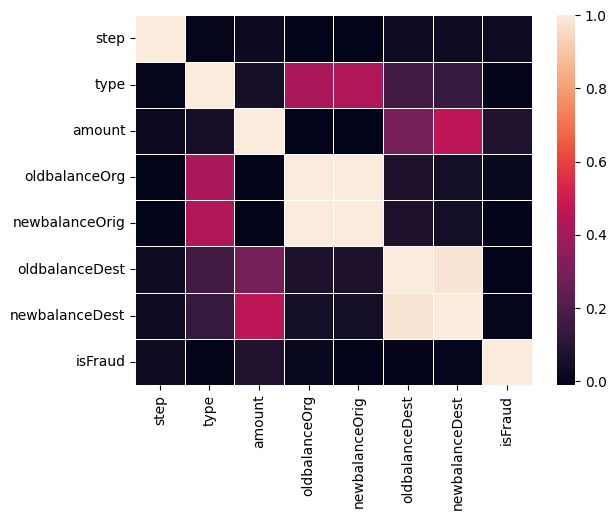

In [23]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(df.corr(), linewidth=0.5)
plt.show()

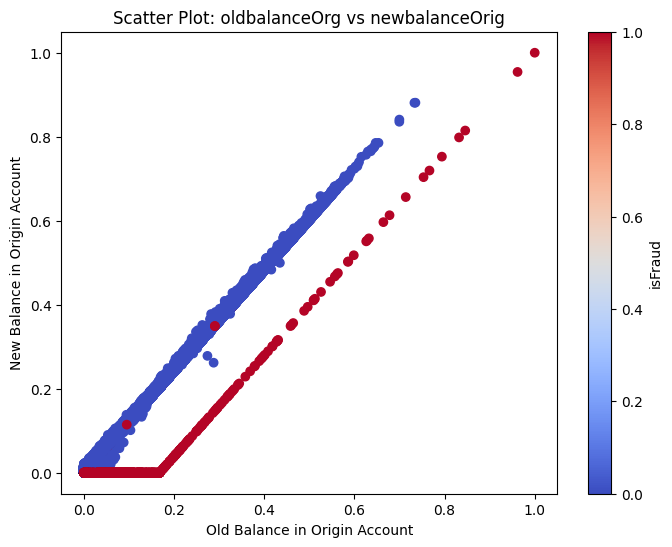

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], c=df['isFraud'], cmap='coolwarm')

plt.title("Scatter Plot: oldbalanceOrg vs newbalanceOrig")
plt.xlabel("Old Balance in Origin Account")
plt.ylabel("New Balance in Origin Account")
plt.colorbar(label="isFraud")
plt.show()

# **`Handeling outliers`**

visulize the outliers

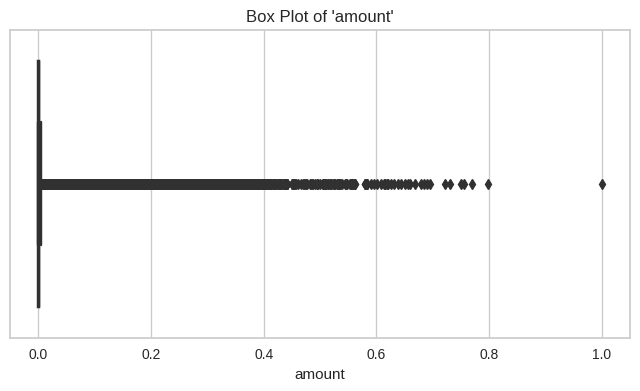

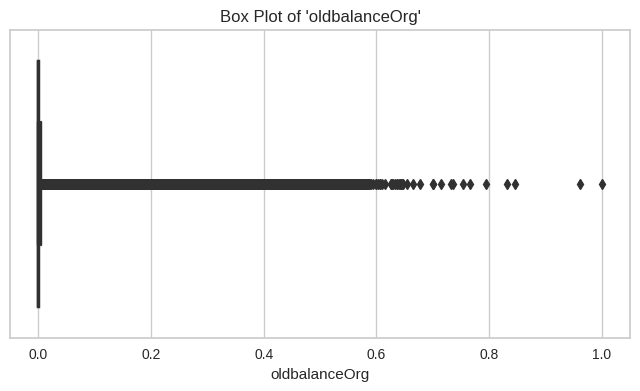

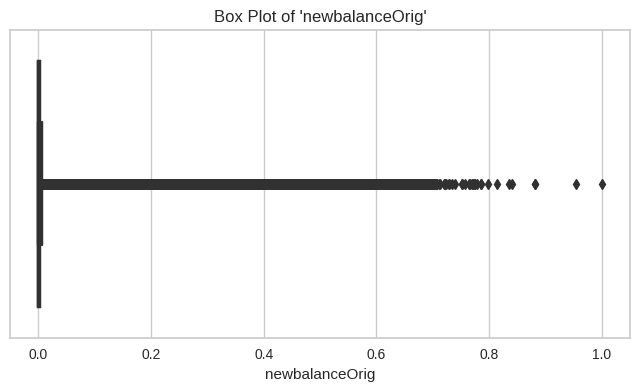

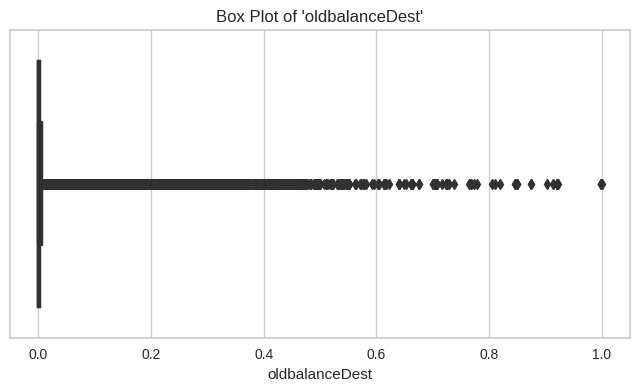

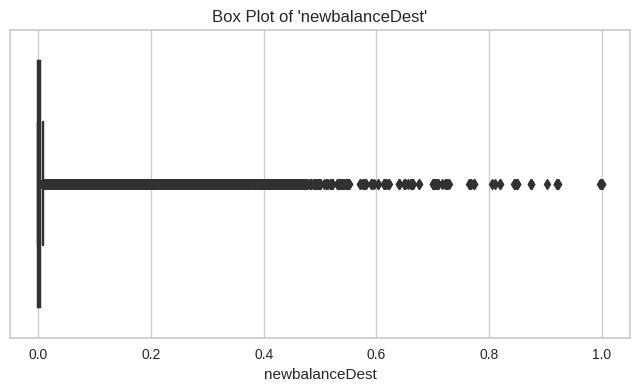

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize outliers
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create a box plot for each numerical column
for column_name in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column_name])
    plt.title("Box Plot of '{}'".format(column_name))
    plt.xlabel(column_name)
    plt.show()


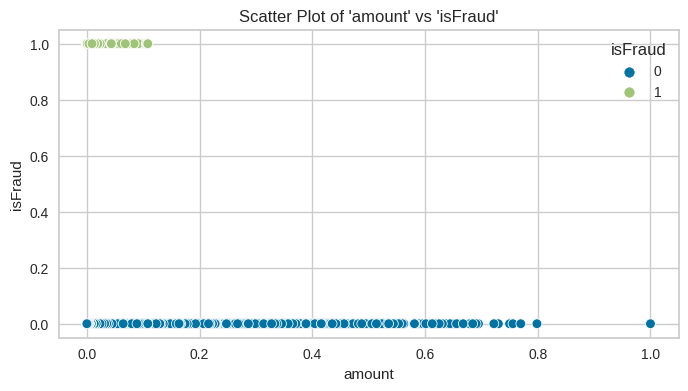

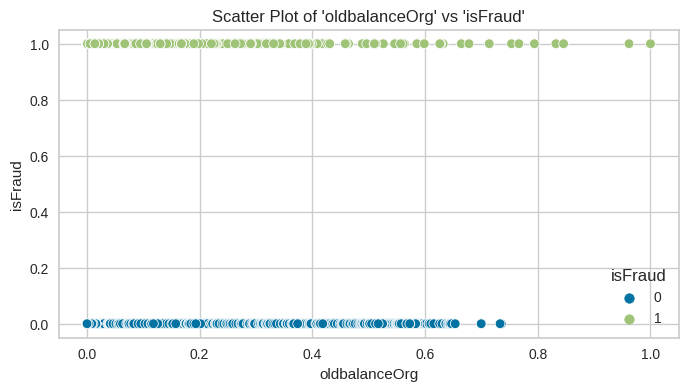

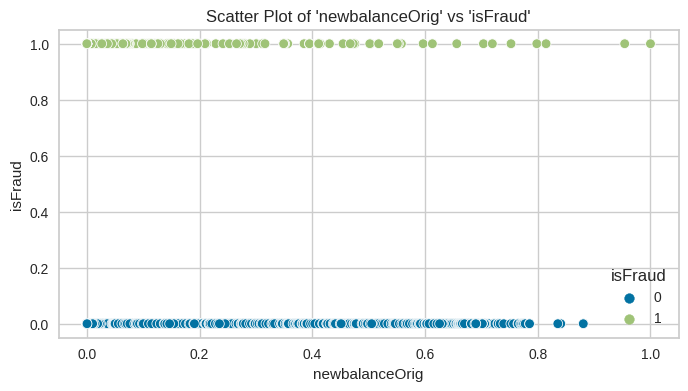

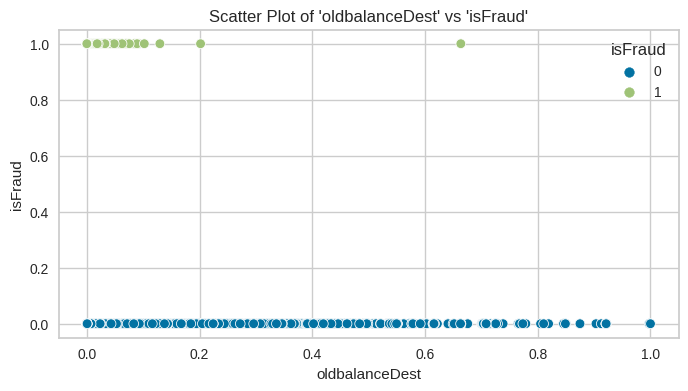

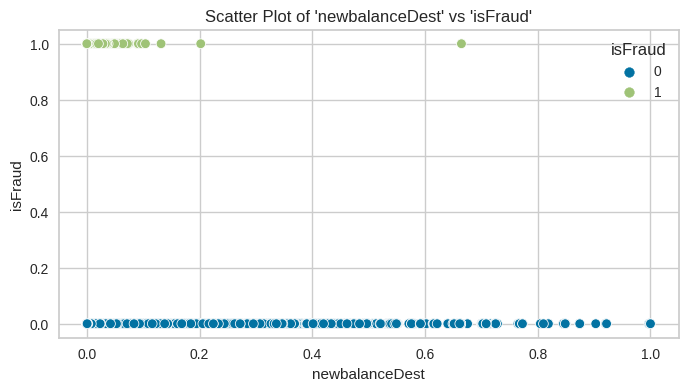

In [31]:
# Create scatter plots for selected columns against 'isFraud' to visualize outliers
for column_name in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column_name, y='isFraud', hue='isFraud')
    plt.title("Scatter Plot of '{}' vs 'isFraud'".format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('isFraud')
    plt.show()


Inter quirtile Range

In [44]:
# List of numerical columns to check for outliers
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
oulier_collectin=[]
# Loop through each numerical column and identify outliers
for column_name in numerical_columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print("Outliers in the '{}' column:".format(column_name))
    print(outliers)
    print(len(outliers))
    oulier_collectin.append(outliers)


Outliers in the 'amount' column:
         step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
85          1     1  0.016287       0.000000             0.0        0.000082   
86          1     1  0.005993       0.000000             0.0        0.001627   
88          1     1  0.008237       0.000000             0.0        0.003595   
89          1     1  0.015458       0.000000             0.0        0.005734   
93          1     1  0.006316       0.000000             0.0        0.001876   
...       ...   ...       ...            ...             ...             ...   
6362613   743     2  0.013617       0.021126             0.0        0.001414   
6362616   743     1  0.068272       0.105923             0.0        0.000000   
6362617   743     2  0.068272       0.105923             0.0        0.000192   
6362618   743     1  0.009195       0.014265             0.0        0.000000   
6362619   743     2  0.009195       0.014265             0.0        0.018286   

      

In [45]:

import numpy as np
from scipy import stats



# Define the threshold for Z-score (you can adjust this as needed)
z_score_threshold = 3.0

# Calculate Z-scores for all numeric columns in the dataset
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Create a DataFrame of Z-scores with the same index and columns as the original dataset
z_scores_df = pd.DataFrame(z_scores, index=df.index, columns=df.select_dtypes(include=[np.number]).columns)

# Identify outliers based on the Z-score threshold
outliers = df[(z_scores_df > z_score_threshold).any(axis=1)]

# Print the rows containing outliers
print("Rows with outliers based on Z-score:")
print(outliers)
print(len(outliers))


Rows with outliers based on Z-score:
         step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2           1     1  0.000002       0.000003             0.0        0.000000   
3           1     2  0.000002       0.000003             0.0        0.000059   
84          1     1  0.004109       0.000000             0.0        0.002528   
88          1     1  0.008237       0.000000             0.0        0.003595   
89          1     1  0.015458       0.000000             0.0        0.005734   
...       ...   ...       ...            ...             ...             ...   
6362615   743     2  0.003674       0.005701             0.0        0.000000   
6362616   743     1  0.068272       0.105923             0.0        0.000000   
6362617   743     2  0.068272       0.105923             0.0        0.000192   
6362618   743     1  0.009195       0.014265             0.0        0.000000   
6362619   743     2  0.009195       0.014265             0.0        0.018286   

  

Removing the outlier came from interquirtile range


In [46]:
oc=set()
for i in range(len(oulier_collectin)):
  oulier_collectin[i]=list(oulier_collectin[i].index.values)
  a=set(oulier_collectin[i])
  oc=oc.union(a)


In [49]:
data=df.drop(list(oc), axis='index')

data is this final cleanded dataset

In [51]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,0.000106,0.002855,0.003233,0.000000,0.000000,0
1,1,0,0.000020,0.000357,0.000391,0.000000,0.000000,0
2,1,1,0.000002,0.000003,0.000000,0.000000,0.000000,1
3,1,2,0.000002,0.000003,0.000000,0.000059,0.000000,1
4,1,0,0.000126,0.000697,0.000603,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
6362605,742,2,0.000591,0.000917,0.000000,0.000000,0.000153,1
6362608,742,1,0.002795,0.004336,0.000000,0.000000,0.000000,1
6362609,742,2,0.002795,0.004336,0.000000,0.000071,0.000796,1
6362610,742,1,0.000686,0.001064,0.000000,0.000000,0.000000,1


In [55]:
data=data.reset_index(drop=True)
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,0.000106,0.002855,0.003233,0.000000,0.000000,0
1,1,0,0.000020,0.000357,0.000391,0.000000,0.000000,0
2,1,1,0.000002,0.000003,0.000000,0.000000,0.000000,1
3,1,2,0.000002,0.000003,0.000000,0.000059,0.000000,1
4,1,0,0.000126,0.000697,0.000603,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
4393182,742,2,0.000591,0.000917,0.000000,0.000000,0.000153,1
4393183,742,1,0.002795,0.004336,0.000000,0.000000,0.000000,1
4393184,742,2,0.002795,0.004336,0.000000,0.000071,0.000796,1
4393185,742,1,0.000686,0.001064,0.000000,0.000000,0.000000,1


Spliting of the data

In [57]:
from sklearn.model_selection import train_test_split
train_x,testx,train_y,testy=train_test_split(data[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']],data[['isFraud']],train_size=0.75,random_state=100)

In [58]:
n=int(len(df)/100)
df1=df.sample(n)

Model Selection

In [26]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 94.3 MB/s eta 0

In [59]:


from pycaret.regression import *

# Assuming 'isFraud' is the target column you want to predict
selected_columns = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']
df_selected = df1[selected_columns]

exp_name = setup(
    data=df_selected,
    target="isFraud"
)

best_model = compare_models()


,Description,Value
0,Session id,3406
1,Target,isFraud
2,Target type,Regression
3,Original data shape,"(63626, 8)"
4,Transformed data shape,"(63626, 8)"
5,Transformed train set shape,"(44538, 8)"
6,Transformed test set shape,"(19088, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0012,0.0006,0.0238,0.3850,0.0167,0.5449,9.7030
lightgbm,Light Gradient Boosting Machine,0.0024,0.0006,0.0242,0.3712,0.0174,0.5586,0.9280
et,Extra Trees Regressor,0.0016,0.0007,0.0258,0.3571,0.0181,0.6404,1.7000
xgboost,Extreme Gradient Boosting,0.0014,0.0006,0.0246,0.3530,0.0174,0.5532,5.0560
gbr,Gradient Boosting Regressor,0.0019,0.0007,0.0263,0.3194,0.0180,0.6947,6.6220
br,Bayesian Ridge,0.0063,0.0011,0.0319,0.0703,0.0225,0.8825,0.0760
lr,Linear Regression,0.0063,0.0011,0.0319,0.0700,0.0225,0.8824,0.8370
lar,Least Angle Regression,0.0072,0.0011,0.0321,0.0462,0.0228,0.8759,0.0680
ridge,Ridge Regression,0.0026,0.0012,0.0335,0.0206,0.0231,0.9862,0.0760
llar,Lasso Least Angle Regression,0.0024,0.0012,0.0339,-0.0006,0.0235,0.9988,0.0660


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Tring 2 methods for modeling

Light Gradient Boosting Machine

In [60]:
pip install lightgbm

In [63]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [65]:
model = LGBMClassifier()
model.fit(train_x, train_y)

# Predicting the Target variable
pred = model.predict(testx)
print(pred)
accuracy = model.score(testx, testy)
print(accuracy)

[LightGBM] [Info] Number of positive: 2324, number of negative: 3292566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.489530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 3294890, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000705 -> initscore=-7.256133
[LightGBM] [Info] Start training from score -7.256133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [68]:
from sklearn.metrics import accuracy_score
score = accuracy_score(testy, pred)
score

1.0

Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(train_x, train_y)

RandomForestRegressor(random_state=0)

In [71]:
Y_pred = regressor.predict(testx)

In [72]:
score1 = accuracy_score(testy, Y_pred)
score1

1.0